# IQR method:

**Interquartile range (IQR) method for outlier detection**

1. Use when data is skewed (Left or Right).
2. Use box plot for detect outliers.
3. If column has missing values fill them first.

## Import Libaraies:

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset:

In [108]:
df=pd.read_csv('../Data/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [109]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


**firslty check is that the column is normal or skewed.**

c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


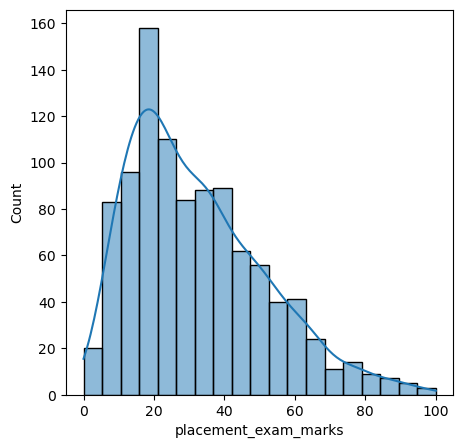

In [110]:
plt.figure(figsize=(5,5))
ax=plt.subplot(1,1,1)

sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

<Axes: >

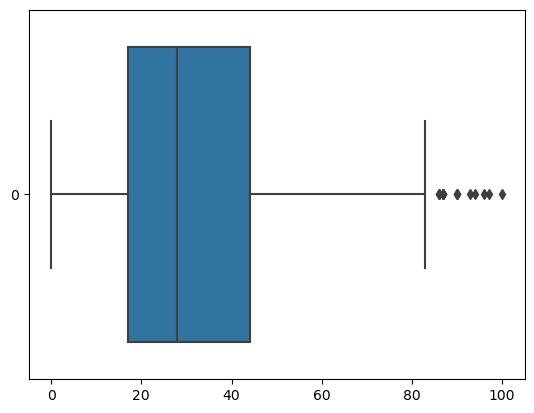

In [111]:
sns.boxplot(df['placement_exam_marks'],orient='h')

**So we see the data is right skewed and the outliers are lies on the left side.**

In [112]:
print('Mean value',df['placement_exam_marks'].mean())
print('Std value',df['placement_exam_marks'].std())
print('Min value',df['placement_exam_marks'].min())
print('Max value',df['placement_exam_marks'].max())

Mean value 32.225
Std value 19.13082233892108
Min value 0.0
Max value 100.0


**Find the IQR**

1. Find the 25th percentile.
2. find the 75th percentile.
3. IQR = 75th percentile - 25th percentile.

In [113]:
percentile25=df['placement_exam_marks'].quantile(0.25)
print('25th percentile is',percentile25)

percentile75=df['placement_exam_marks'].quantile(0.75)
print('75th percentile is',percentile75)

25th percentile is 17.0
75th percentile is 44.0


In [114]:
IQR = percentile75 - percentile25
print('The IQR is',IQR)

The IQR is 27.0


**Now find the upper and lower limit**

**Formula**
for upper limit = Q3 + 1.5 * IQR
for lower limit = Q1 - 1.5 * IQR

In [115]:
upper_limit=percentile75 + 1.5 * IQR
print('The upper limit is',upper_limit)

lower_limit=percentile25 - 1.5 * IQR
print('The Lower limit',lower_limit)

The upper limit is 84.5
The Lower limit -23.5


**Now find the outliers**

In [116]:
df[df['placement_exam_marks'] > upper_limit]
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


**Trimming data**

In [118]:
trim = df[df['placement_exam_marks'].between(lower_limit, upper_limit)]
trim

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\miniconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

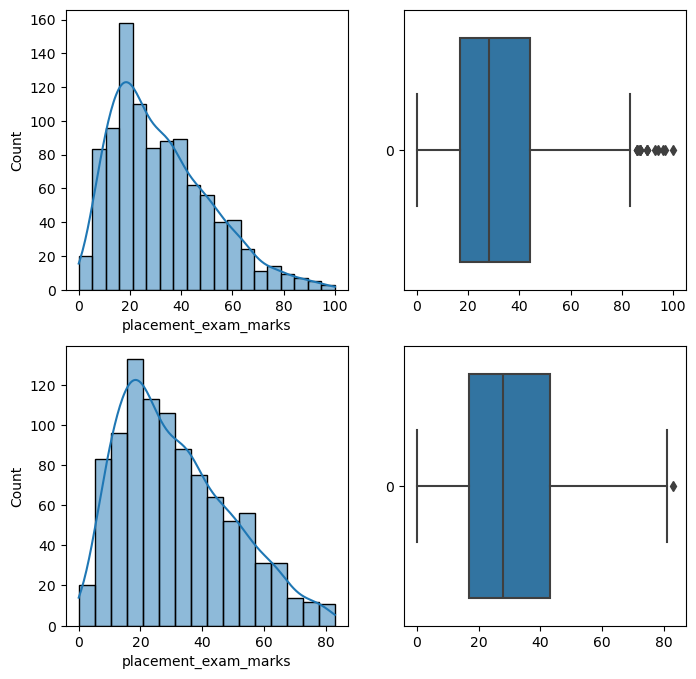

In [131]:
plt.figure(figsize=(8,8))
ax=plt.subplot(2,2,1)

sns.histplot(df['placement_exam_marks'],kde=True)

ax=plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='h')

ax=plt.subplot(2,2,3)
sns.histplot(trim['placement_exam_marks'],kde=True)

ax=plt.subplot(2,2,4)
sns.boxplot(trim['placement_exam_marks'],orient='h')

**ALL SET**